# Assignment: Unsupervised Machine Learning \ Clustering

In this assignment you will continue the experience you've done with clustering - this time, via hierarchical clustering and DBSCAN.

## Part 1: Hierarchical Clustering
(Practice material by Etam Benger)

In this part we are going to experiment with Hierarchical Clustering, a very powerfull clustering technique that can easily be interperted and explained via the dendrgoram.

The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

### Different ways to calculate the distance between clusters can yield strikingly different results

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Labels
l = ['A', 'B', 'C', 'D', 'E', 'F']

# Distance matrix
# (Note that it must be symmetrical and its diagonal is always 0)
d = np.array([[0, 1, 3, 3, 3, 4],
              [1, 0, 4, 2, 3, 2],
              [3, 4, 0, 3, 2, 5],
              [3, 2, 3, 0, 2, 4],
              [3, 3, 2, 2, 0, 5],
              [4, 2, 5, 4, 5, 0]])

In [3]:
# The hierarchy.linkage function uses a condensed distance matrix,
# which is a flattened vector of the upper right triangle of the matrix:
# (Caution! If you use the distance matrix as is, you will get erroneous
# results -- in that case the algorithm will assume that each row is a
# vector that represents the respective point, and will calculate the
# euclidean distance between those vectors, which is absolute nonsense.)
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

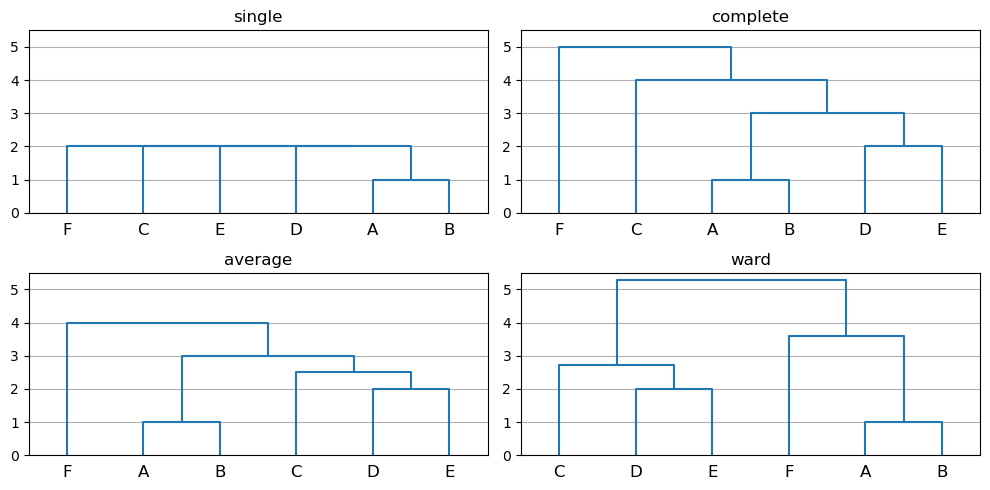

In [4]:
# Please read the documentation here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#
# As you'll see below, the different methods of linkage may produce very different structures
# and, consequently, very different clusters. Try to understand why (look at the distance matrix
# and follow the formulas in the documentation).
# Sometimes the characteristics of the problem suggest what method is more natural to use than
# the others. This is especially true with respect to the complete (= farthest point) and single
# (= nearest point) methods. Other times the 'correct' method to use is not obvious at all, and
# it requires inspecting the results and the data thoroughly. The average method usually works
# well, however.

methods = ['single', 'complete', 'average', 'ward']  # There are other methods as well, see documentation

plt.figure(figsize=(10, 5))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method)
    
    ############# This is the relevant part: #############
    #                                                    #
    lnk = hierarchy.linkage(squareform(d), method)
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    #                                                    #
    ######################################################
    
    plt.ylim(0, 5.5)
    plt.grid(axis='y')

plt.tight_layout()

### Altering the order in which clusters are joined can also yield strikingly different results

In [5]:
# Labels
l = ['A', 'B', 'C', 'D', 'E']

# Distance matrices
epsilon = 10**-16
a, b = 1 + epsilon, 1 - epsilon

d1 = np.array([[0, 1, a, 5, 5],
               [1, 0, 3, 5, 5],
               [a, 3, 0, 3, b],
               [5, 5, 3, 0, 1],
               [5, 5, b, 1, 0]])

d2 = np.array([[0, 1, b, 5, 5],
               [1, 0, 3, 5, 5],
               [b, 3, 0, 3, a],
               [5, 5, 3, 0, 1],
               [5, 5, a, 1, 0]])

In [6]:
# The Frobenius distance between the matrices is negligible
np.sqrt(np.sum((d1-d2)**2))

2.220446049250313e-16

In [7]:
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

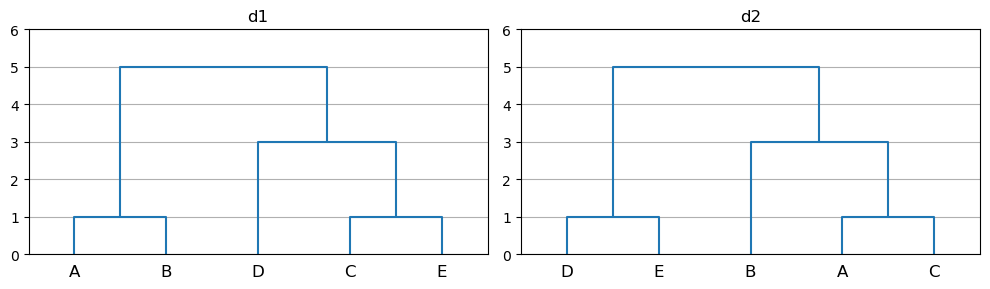

In [8]:
# But the resulting clusters are very different!

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1, d2]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')
plt.tight_layout()

## Challenge 1.1
Data preparation and preprocessing can help in reducing such "hypersensitivity". One of the techniques is to clean the distance matrix from noise before the actual clustering. This can be done by... clustering. Your tasks:
1. Apply the K-Means algorithm to clean the distance matrix, assuming the correct number of clusters is 4. Clustering can be applied on each matrix independently, although in some cases it's wiser to do a cross-matrix clustering.
2. Create new cleaned versions of the distance matrices (d1_clean and d2_clean).
3. Repeat the above process (previus cell) to plot the results

c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

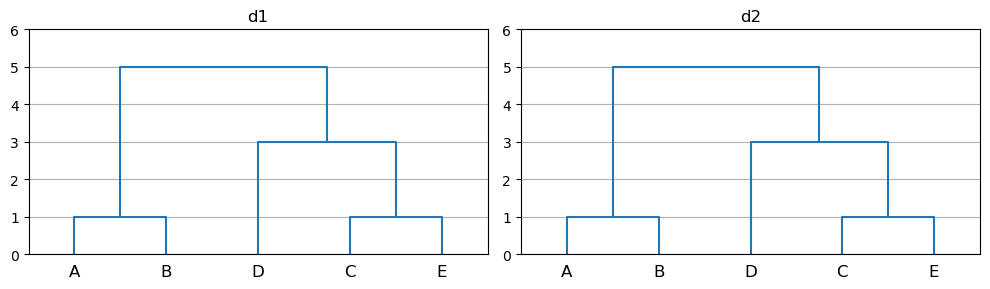

In [9]:
# Add your code for Challenge 1.1 after this line, and keep it in this cell.
from sklearn.cluster import KMeans

def clean_by_cluster(dmat):
    # The two matrices differ by a very small amount, which is enough to throw hierarchical clustering off (because nearly-tied distances make big differences in clustering order) 
    # By clustering the distances together beforehand, I combine all to a single mean value, eliminating the effect of noise (although the random order might still be a problem)
    flat = squareform(dmat)[:, np.newaxis]
    
    kmeans = KMeans(3).fit(flat) # I used 3 instead of 4 because self distances (0) are ommited of the flat version of the matrix, and I didn't see a need to cluster zero distances together (or the same values twice)
    labels = kmeans.predict(flat)
    cents = kmeans.cluster_centers_
    
    return squareform(cents[labels].flatten())


d1_clean = clean_by_cluster(d1)
d2_clean = clean_by_cluster(d2)

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1_clean, d2_clean]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')
plt.tight_layout()



### Analyzing voting data

We can also use hierarchical clustering to analyzie election voting data, as we will see in the following exercise

We will use here data from the 18th Kneset elections. https://en.wikipedia.org/wiki/2009_Israeli_legislative_election


In [10]:
df = pd.read_csv('data/Elections.csv')

# Show first 10 rows
df[:10]
df.shape

(1156, 41)

In [11]:
party_names = list(df.columns)[7:]
print(party_names)

['Avoda', 'Or', 'BaitYehudi', 'YahadutHatora', 'Balad', 'MeimadYarukim', 'Hadash', 'Gimlaim', 'EfraimSne', 'IhudLeumi', 'Israelim', 'Lev', 'NizolimAndAle', 'Kadima', 'IsraelBeytenu', 'Likud', 'Merez', 'Nudelman', 'RuahHadasha', 'Lazuz', 'LojmeiHevra', 'Raam', 'Koah', 'Koah.1', 'Brit', 'Gever', 'Zomet', 'Zabar', 'Daam', 'AleYarok', 'Koah.2', 'Lidar', 'Yarok', 'Shas']


In [12]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 100

# Data matrix and labels list (41 columns - metadata ones)
x = np.zeros((n, 34))
labels_r = []

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x[i] = row[7:]                         # take only the votes, not the other meta-data
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

# Normalize rows (so they represent proportions):
x = x/(np.sum(x, axis=1).reshape(-1, 1))
x = pd.DataFrame(x,columns=party_names)

In [13]:
# You can experiment with the different methods ('single', 'complete', 'average', 'ward'):
# (Note that we don't use squareform here, so the linkage function will assume by
# default that x is not a distance matrix but a set of observations, and will calculate
# the euclidean distance between them. We could, instead, calculate our own distance
# matrix using other distance measures between distributions, for example the Kullback-
# Leibler divergence (relative entropy).)
lnk = hierarchy.linkage(x, 'average')

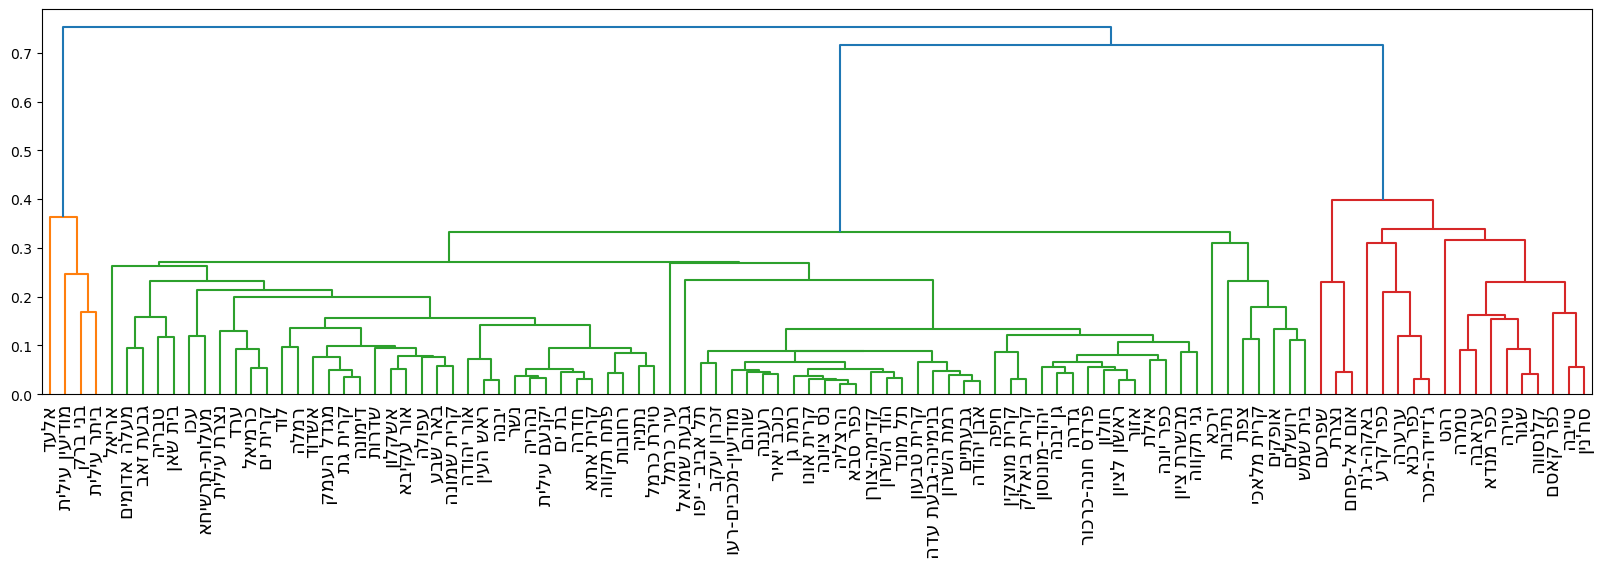

In [14]:
plt.figure(figsize=(20, 5))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=14, color_threshold=0.5);

## Challenge 1.2
When using our domain expertise regarding the population in Israeli cities and villages, we can cleary conclude from the results that our society is mainly splitted according to their "religiosity". Although the jingle says "there's no more right or left", your mission, should you choose to accept it, is to find a way to distinguish between right and left.

The guiding line:
1. We want to cluster parties (for example, left or right winged). Adjust the matrix accordingly.
2. You can change the max number of cities (100 is set now) or the normalization technique.
3. We do not expect to have exact coalition proposed by this technique, however, explain (in a text cell) the gaps between your results and the real agenda proposed by the parties. What exactly could have caused this gaps?

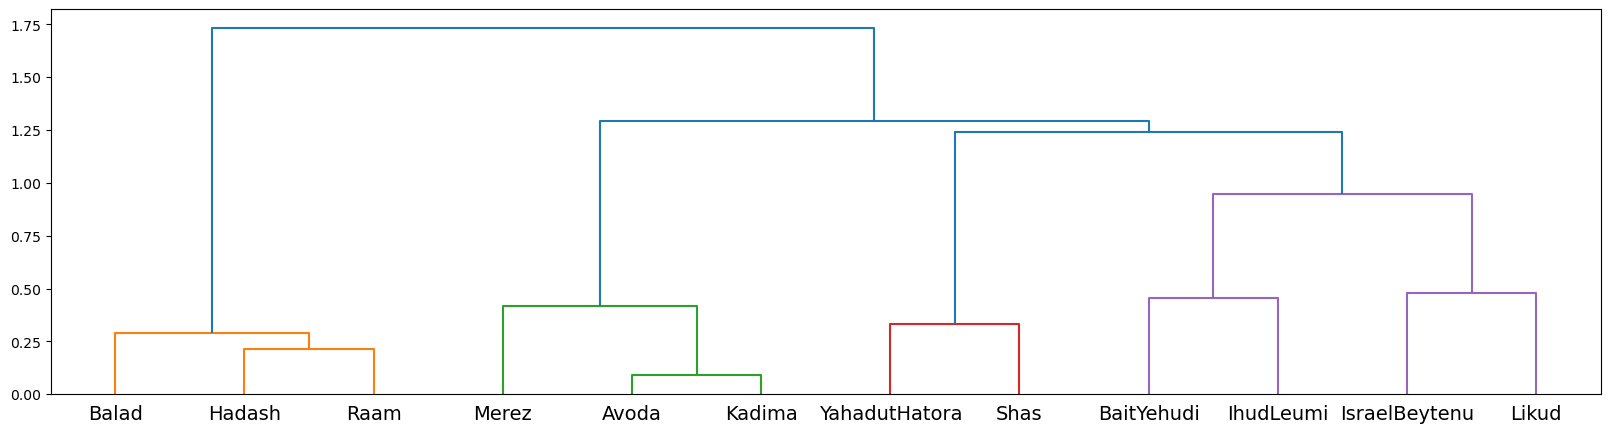

In [15]:
# Add your code for Challenge 1.2 after this line, and keep it in this cell.

plt.figure(figsize=(20, 5))

all_votes = df['TotalVotes'].sum()
votes_per_party = df.loc[:,'Avoda':].sum(axis=0)
pass_ahuz_hahasima = votes_per_party.div(all_votes).gt(0.02) # Ahuz hahasima was 2% back then

edf=df.copy().iloc[:101, :]
edf.set_index('TownNumber', inplace=True)

votes = edf.loc[:,'Avoda':].T
other = edf.loc[:,:'Disqualified']

votes = votes[pass_ahuz_hahasima] # only keep parties that got more than 1% of the votes

votes /= other['Potential'] # percent out of total voting potential

lnk = hierarchy.linkage(votes, 'complete', 'correlation') 
hierarchy.dendrogram(lnk, labels=votes.index, leaf_font_size=14, color_threshold=1);

Assuming we define the right and left division as the difference in opinion of the right solution to the palestenian issue:
The clusters above accurately capture the relationships between the public image of the different parties. The purple cluster is composed two sub clusters that differ by religious status, that we saw has a significant role in state politics, but are definitely right winged. 

The red cluster are the ulra orthodox, who aren't as right leaning, but are indeed the closest partners to that clusters.  

Kadima  was composed of a combination of right and left wing MPs, but 2009 was right after the Hitnatkut, a dramatic left-leaning move that greatly affected who voted for them, so they're accurately clustered with the other left leaning parties in the green cluster. 

The orange cluster is composed of arab parties that don't easily fit the right-left division, but probably lean more to the left. Their seperation from the rest left leaning parties show that the religious division is still more significant.

## Part 2 - DBSCAN


In this part of the exercise, we will experiment with the DBSCAN algorithm on a synthetic set of data

In [16]:
# auxilary plotting functions
def plot(X,y=None):# plot
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing

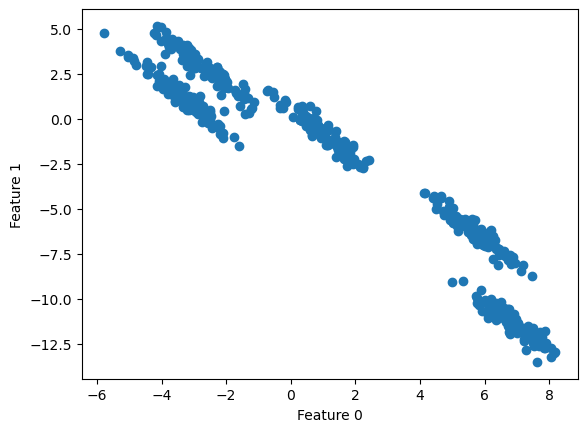

In [17]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=500, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plot(X)

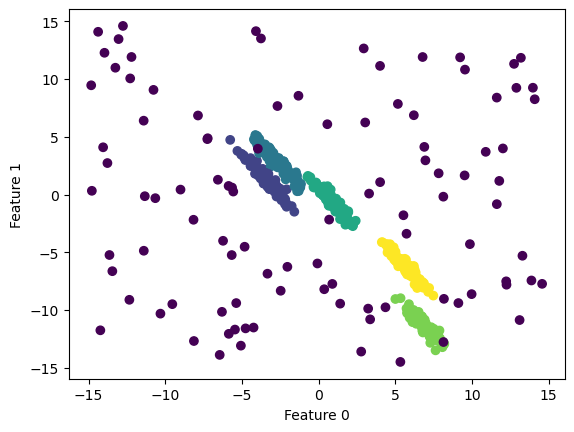

In [18]:
# Adding Noise to data
outliers = 30 * (np.random.RandomState(42).rand(100, 2) ) - 15.0
X = pd.DataFrame(np.concatenate([X, outliers]))
y = pd.DataFrame(np.concatenate([y, [-1]*len(outliers)]))
plot(X.values,y)

### K-Means attempt
Lets see how those outliers and non-spherical shapes affects K-Means clustreing

c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


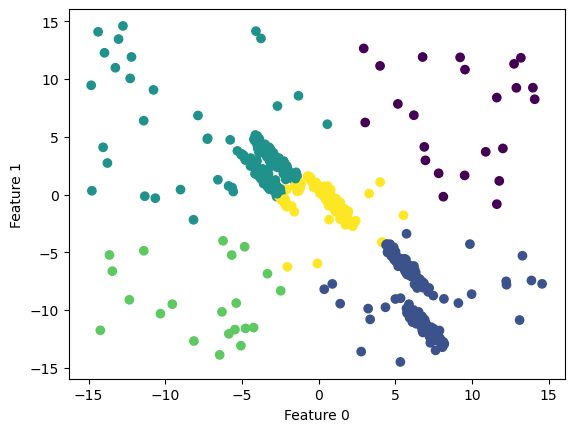

In [19]:
# cluster the data into five clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)

plot(X.values,kmeans_clusters)

Not surprisingly, K-Means failed to cluster properly the data above 

As we saw in the lecture, DBSCAN can overcome those issues. Yet we still need to determine the parametrs...




# Estimateing $\varepsilon$

## Challenge 2.1

Your co-worker suggested a way to select $\epsilon$ of dbscan.
He wants to go over different eps values and find the one that maximizes the adjusted rand index value. For that, you paid some amount of money and had some guys labled 50 points for you. The indices of the labeled samples you are allowed to use are in the next cell.
Implement the algorithm and find the best $\epsilon$ using this method.
1. Create an array of possible $\epsilon$ values.
2. Iterate over the different values and find the best $\epsilon$ value. What is it?
3. Visualize the results of the best one.



In [20]:
np.random.seed(0)
labeled_samples = np.random.choice(601,50,replace=False)
y.iloc[labeled_samples,0].head()

596   -1
52     1
190    1
165    4
344    4
Name: 0, dtype: int32

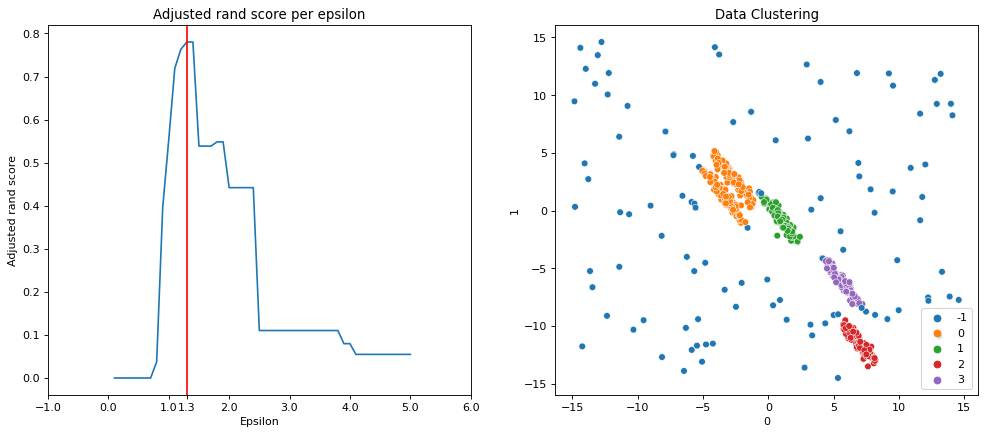

In [21]:
# minPts are given and are not required to be estimated.
# Yet, in the cells after completing the task feel free to play with it and get better result if you can!
minPts = 50 

# YOUR CODE HERE - keep results in this cell
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
import seaborn as sns

scores = {}
for e in np.linspace(0.1, 5, 50):

    y_pred_subsample = DBSCAN(eps=e, min_samples=minPts).fit_predict(X)[labeled_samples]
    y_true_subsample = y.iloc[labeled_samples,0]
    scores[e] = adjusted_rand_score(y_true_subsample, y_pred_subsample)

scores = pd.Series(scores)
best_pred = DBSCAN(eps=scores.idxmax(), min_samples=minPts).fit_predict(X)

plt.figure(figsize=(15, 6), dpi=80)
ax = plt.subplot(1, 2, 1)
scores.plot(ax=ax)
ax.set_title('Adjusted rand score per epsilon')
ax.set_xlabel('Epsilon')
ax.set_ylabel('Adjusted rand score')
plt.axvline(x=scores.idxmax(), c='r')
plt.xticks(list(plt.xticks()[0]) + [scores.idxmax()])

ax = plt.subplot(1, 2, 2)
ax.set_title('Data Clustering')
sns.scatterplot(data=X, x=0, y=1, hue=best_pred, palette='tab10');



How many values of $\epsilon$ did you iterate? can you find a way to narrow down the range of the search?

Answers are expected in a textual form

I iterated over 50 values of $\epsilon$. 

Since I have some labled data, I could try and find the largest distance between points that share a cluster within it, and add some kind of safety margin based on the largest in-cluster variance. It would be far from accurate, but probably fine as an upper range for $\epsilon$ search. 

I could also just use OPTICS to try and find a good epsilon without using my labled data. 

## Challenge 2.2


Support yout findings by plotting the Purity score.
Implement the purity score and print the score for the best epsilon you have found.
Print the results for:
1. The small labeled set you were given
2. The rest of the data (not including the set from 1)
3. The whole data together

Are we overfitting?

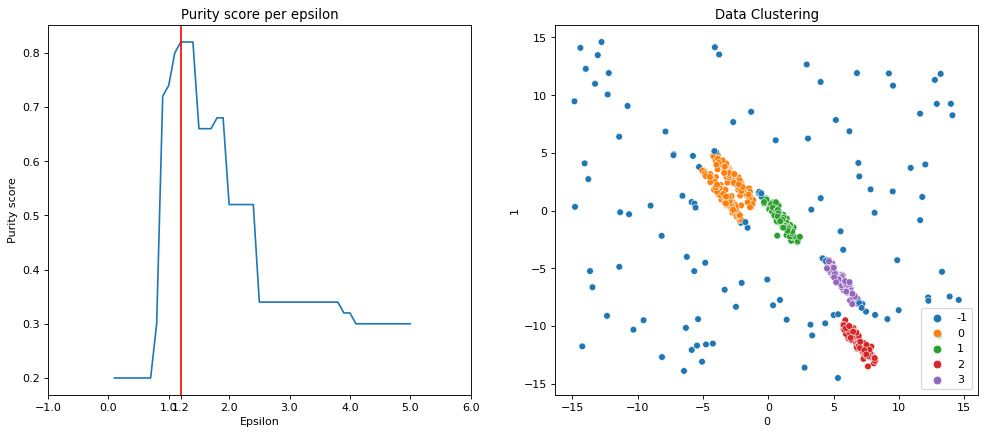

In [22]:
from sklearn.metrics.cluster import contingency_matrix

def purity_score(y_true, y_pred):
    cont_matrix = contingency_matrix(y_true, y_pred)
    return cont_matrix.max(axis=0).sum() / y_true.shape[0]

scores = {}
for e in np.linspace(0.1, 5, 50):

    y_pred_subsample = DBSCAN(eps=e, min_samples=minPts).fit_predict(X)[labeled_samples]
    y_true_subsample = y.iloc[labeled_samples,0]
    scores[e] = purity_score(y_true_subsample, y_pred_subsample)

scores = pd.Series(scores)
best_pred = DBSCAN(eps=scores.idxmax(), min_samples=minPts).fit_predict(X)


plt.figure(figsize=(15, 6), dpi=80)
ax = plt.subplot(1, 2, 1)
scores.plot(ax=ax)
ax.set_title('Purity score per epsilon')
ax.set_xlabel('Epsilon')
ax.set_ylabel('Purity score')
plt.axvline(x=scores.idxmax(), c='r')
plt.xticks(list(plt.xticks()[0]) + [scores.idxmax()])

ax = plt.subplot(1, 2, 2)
ax.set_title('Data Clustering')
sns.scatterplot(data=X, x=0, y=1, hue=best_pred, palette='tab10');

In [23]:
# Purity calculation here



print(f'Purity for subset: {purity_score(y_true_subsample.values, best_pred[labeled_samples])}')

all_except = np.ones(best_pred.shape, dtype=bool)
all_except[labeled_samples] = False
print(f'Purity for all except subset: {purity_score(y[all_except].values, best_pred[all_except]):.2f}')

print(f'Purity for all: {purity_score(y_true_subsample.values, best_pred[labeled_samples])}')



Purity for subset: 0.82
Purity for all except subset: 0.80
Purity for all: 0.82


Slightly overfitting, not signnificantly so




# Good Luck and Enjoy Learning Machine Learning!

